<a href="https://colab.research.google.com/github/Cynthia-Wanja-Dinah/hand-written/blob/main/hand_written_number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf


In [4]:
mnist=tf.keras.datasets.mnist #hand written characters


In [6]:
#unpacking the dataset into the trainning and testing dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


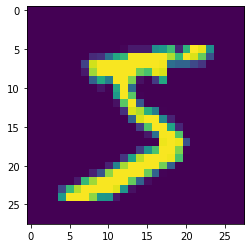

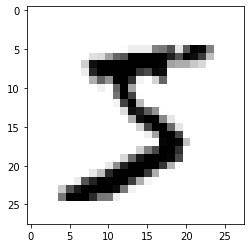

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)


In [12]:
#checking the value of each pixel
print(x_train)#before normalization

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


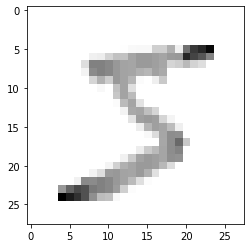

In [13]:
#normalizing the data pre-processing step
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [14]:
#after normalizing
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
#resizing the shape to make it esy to apply convolution
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)##increasing one dimension for karnel operation
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)##increasing one dimension for karnel operation
print("trainning sample dimension",x_trainr.shape)
print("testing sample dimension",x_testr.shape)

trainning sample dimension (60000, 28, 28, 1)
testing sample dimension (10000, 28, 28, 1)


In [17]:
##creating the deep learning neural network
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D

In [21]:
##creating the neural network
model=Sequential()
###first convolution layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))##only the convolution layer to mention the input layer size
model.add(Activation("relu"))## activation function
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling

##2nd convolution layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))##only the convolution layer to mention the input layer size
model.add(Activation("relu"))## activation function
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling

##3rd convolution layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))##only the convolution layer to mention the input layer size
model.add(Activation("relu"))## activation function
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling

##fully connected layer1
model.add(Flatten())##before using fully connected need to flatten so that 2D to 1D
model.add(Dense(64))##
model.add(Activation("relu"))## activation function


##fully connected layer2
model.add(Dense(32))##
model.add(Activation("relu"))## activation function

##fully connected layer3 .output must be fully connected to number of classes ,10(10-9)
model.add(Dense(10))##The last dense layer must be equal to 10
model.add(Activation('softmax'))## activation function is changed to softmax (class probabilities)




In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_1 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_2 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [20]:
print("total training sample:",len(x_trainr))

total training sample: 60000


In [24]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [25]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)##training model

Epoch 1/5
1313/1313 [==============================] - 17s 6ms/step - loss: 0.3342 - accuracy: 0.8938 - val_loss: 0.1375 - val_accuracy: 0.9571
Epoch 2/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1059 - accuracy: 0.9680 - val_loss: 0.0937 - val_accuracy: 0.9718
Epoch 3/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0741 - accuracy: 0.9770 - val_loss: 0.0877 - val_accuracy: 0.9730
Epoch 4/5
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0576 - accuracy: 0.9823 - val_loss: 0.1007 - val_accuracy: 0.9708
Epoch 5/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.0719 - val_accuracy: 0.9799


In [26]:
##evaluating on test dataset
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("the loss of 10,000 test samples",test_loss)
print("validation accuracy on 10,000 samples",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0602 - accuracy: 0.9820
the loss of 10,000 test samples 0.060239359736442566
validation accuracy on 10,000 samples 0.9819999933242798


In [28]:
predictions=model.predict([x_testr])

313/313 [==============================] - 1s 2ms/step


In [29]:
print(predictions)

[[1.67501157e-09 9.21021481e-08 1.50925985e-06 ... 9.99993682e-01
  1.02364368e-07 1.80125639e-07]
 [2.34742311e-06 1.14550495e-07 9.99995351e-01 ... 1.04105982e-06
  1.69979472e-07 4.36684147e-08]
 [1.54700647e-05 9.99842882e-01 8.00630096e-06 ... 4.73639545e-07
  3.20377126e-06 1.70793815e-08]
 ...
 [3.01620995e-09 1.78901985e-07 1.39955844e-07 ... 7.72695898e-08
  1.67632686e-06 3.51310996e-06]
 [5.69201029e-06 4.55726568e-10 5.54280755e-09 ... 9.30475030e-10
  5.35535728e-05 6.43845283e-07]
 [1.45343192e-05 1.06377250e-07 2.51663769e-05 ... 6.03847582e-07
  2.76873961e-05 7.29297994e-07]]


In [30]:
print(np.argmax(predictions[0]))

7


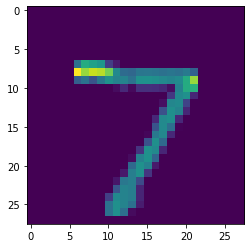

In [31]:
plt.imshow(x_test[0])

In [32]:
print(np.argmax(predictions[128]))

8


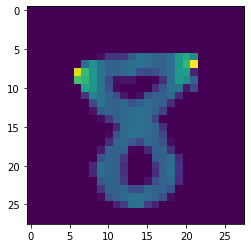

In [33]:
plt.imshow(x_test[128])

In [36]:
print(np.argmax(predictions[250]))

4


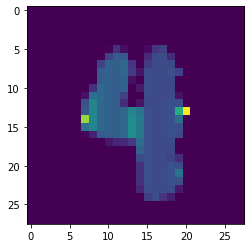

In [37]:
plt.imshow(x_test[250])

In [39]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
import cv2
img=cv2.imread('/content/download.jpeg')


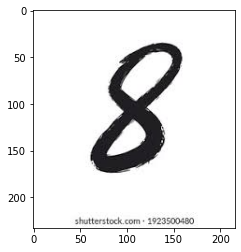

In [76]:
plt.imshow(img)

In [77]:
img.shape

(233, 216, 3)

In [78]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [79]:
gray.shape

(233, 216)

In [80]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [81]:
resized.shape

(28, 28)

In [82]:
newing=tf.keras.utils.normalize(resized,axis=1)#zero to one scalling

In [83]:
newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)#kerneloperation layer

In [84]:
newing.shape

(1, 28, 28, 1)

In [85]:
predictions=model.predict(newing)

1/1 [==============================] - 0s 20ms/step


In [86]:
print(np.argmax(predictions))

8
